# Andreas Kyratzis

# Part B code

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Definition of Complex landscape
def ComplexLandscape(x, y):
    return 4*(1-x)**2*np.exp(-(x**2)-(y+1)**2) -15*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) -(1./3)*np.exp(-(x+1)**2 - y**2)-1*(2*(x-3)**7 -0.3*(y-4)**5+(y-3)**9)*np.exp(-(x-3)**2-(y-3)**2)


In [3]:
# Definition of gradient of Complex landscape
def ComplexLandscapeGrad(x, y):
    g = np.zeros(2)
    g[0]=-8* np.exp(-(x**2)-(y+1)**2)*((1-x)+x*(1-x)**2)-15* np.exp(-x**2-y**2)*((0.2-3*x**2) -2*x*(x/5 - x**3 - y**5)) +(2./3)*(x+1)* np.exp(-(x+1)**2 - y**2)-1* np.exp(-(x-3)**2-(y-3)**2)*(14*(x-3)**6-2*(x-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    g[1]=-8*(y+1)*(1-x)**2* np.exp(-(x**2)-(y+1)**2) -15* np.exp(-x**2-y**2)*(-5*y**4 -2*y*(x/5 - x**3 - y**5)) +(2./3)*y* np.exp(-(x+1)**2 - y**2)-1* np.exp(-(x-3)**2-(y-3)**2)*((-1.5*(y-4)**4+9*(y-3)**8)-2*(y-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    return g

In [4]:
# Definition of Simple landscape
def SimpleLandscape(x, y):
    return np.where(1-np.abs(2*x)>0,1-np.abs(2*x)+x+y,x+y)

In [5]:
# Definition of gradient of Simple landscape
def SimpleLandscapeGrad(x, y):
    g = np.zeros(2)
    if 1 - np.abs(2 * x) > 0:
        if x < 0:
            g[0] = 3
        elif x == 0:
            g[0] = 0
        else:
            g[0] = -1
    else:
        g[0] = 1
    g[1] = 1
    return g

In [6]:
# Function to draw a surface (equivalent to ezmesh in Matlab)
# See argument cmap of plot_surface instruction to adjust color map (if so desired)
def DrawSurface(fig, varxrange, varyrange, function):
    """Function to draw a surface given x,y ranges and a function."""
    ax = fig.gca(projection='3d')
    xx, yy = np.meshgrid(varxrange, varyrange, sparse=False)
    z = function(xx, yy)
    ax.plot_surface(xx, yy, z, cmap='RdBu') # color map can be adjusted, or removed! 
    fig.canvas.draw()
    return ax

## 1.1

In [7]:
# Function implementing gradient ascent
def GradAscent(StartPt,NumSteps,LRate):
    MaxHeight = SimpleLandscape(2,2) #get the maximum height
    MaxFoundFlag = 0
    for i in range(NumSteps):
        
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        Height = SimpleLandscape (StartPt[0],StartPt[1])
        #Height = ComplexLandscape (StartPt[0],StartPt[1])
        
        # TO DO: Plot point on the landscape 
        # Use a markersize that you can see well enough (e.g., * in size 10)
        ax.plot([StartPt[0]],[StartPt[1]],[Height], '*', color = 'Red', MarkerSize = 8)
        
        
        # TO DO: Calculate the gradient at StartPt using SimpleLandscapeGrad or ComplexLandscapeGrad
        GradientAtStartPt = SimpleLandscapeGrad(StartPt[0],StartPt[1])
        #GradientAtStartPt = ComplexLandscapeGrad(StartPt[0],StartPt[1])
        
        
        
        # TO DO: Calculate the new point and update StartPt
        StartPt += LRate * GradientAtStartPt
        
        # Ensure StartPt is within the specified bounds (un/comment relevant lines)
        StartPt = np.maximum(StartPt,[-2,-2])
        StartPt = np.minimum(StartPt,[2,2])
        #StartPt = np.maximum(Start,[-3,-3])
        #StartPt = np.minimum(StartPt,[7,7])
            
        #NB: to stop the algorithm after the maximum has been
        #reached, use an if statement to test whether the maximum height has been
        #reached, then use the function break to break out of the for loop.
        iterations = i + 1
        difference = abs(Height - MaxHeight)
        if (difference < 0.005): #allowing slight rounding with value 0.005
            MaxFoundFlag = 1 # flag to show that the maximum has been reached
            return ( iterations, MaxFoundFlag)
            break
        
    return ( iterations, MaxFoundFlag)
            
        

In [8]:
# TO DO: Mutation function
# Returns a mutated point given the old point and the range of mutation
def Mutate(OldPt,MaxMutate):
    
    # TO DO: Select a random distance MutDist to mutate in the range (-MaxMutate,MaxMutate)
    MutDist = np.random.uniform(-MaxMutate, MaxMutate , size = 1)
    
    # TO DO: Randomly choose which element of OldPt to mutate and mutate by MutDist
    
    randElement = np.random.randint(0,2) #choose one of two elements randomly
    #in order to mutate the correct point we need to set MutatedPt as the OldPt
    MutatedPt = OldPt
    MutatedPt[randElement] = MutatedPt[randElement] + MutDist
    
    return MutatedPt

In [9]:
# Function implementing hill climbing
def HillClimb(StartPt,NumSteps,MaxMutate):
    MaxHeight = SimpleLandscape(2,2) #get the maximum height
    MaxFoundFlag = 0
    for i in range(NumSteps):
        
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        Height = SimpleLandscape(StartPt[0],StartPt[1])
        #Height = ComplexLandscape(StartPt[0],StartPt[1])

        # TO DO: Plot point on the landscape 
        # Use a markersize that you can see well enough (e.g., * in size 10)
        
        ax.plot([StartPt[0]],[StartPt[1]],[Height], '*', color = 'Yellow', MarkerSize = 8)

        
        # Mutate StartPt into NewPt
        NewPt = Mutate(np.copy(StartPt),MaxMutate) # Use copy because Python passes variables by references (see Mutate function)
        
        # Ensure NewPt is within the specified bounds (un/comment relevant lines)
        NewPt = np.maximum(NewPt,[-2,-2])
        NewPt = np.minimum(NewPt,[2,2])
        #NewPt = np.maximum(NewPt,[-3,-3])
        #NewPt = np.minimum(NewPt,[7,7])
               
        # TO DO: Calculate the height of the new point
        newHeight = SimpleLandscape(NewPt[0],NewPt[1])
        #newHeight = ComplexLandScape(NewPt[0],NewPt[1])
            
        # TO DO: Decide whether to update StartPt or not
        if newHeight > Height:
            StartPt = NewPt  # substitutes old height with new when new is bigger
         
        #NB: to stop the algorithm after the maximum has been
        #reached, use an if statement to test whether the maximum height has been
        #reached, then use the function break to break out of the for loop.
        iterations = i + 1
        difference = abs(Height - MaxHeight)
        if (difference < 0.005): #allowing slight rounding with value 0.005
            MaxFoundFlag = 1 # flag to show that the maximum has been reached
            return ( iterations, MaxFoundFlag)
            break
        
    return ( iterations, MaxFoundFlag)


## 1.1 Gradient Ascent

GradAscent (50, 0)
GradAscent (50, 0)
GradAscent (27, 1)
GradAscent (17, 1)
GradAscent (50, 0)
GradAscent (15, 1)


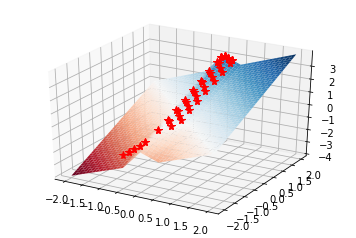

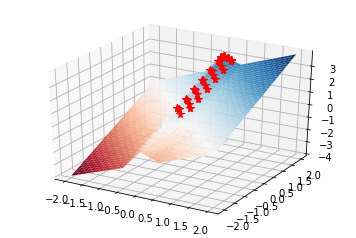

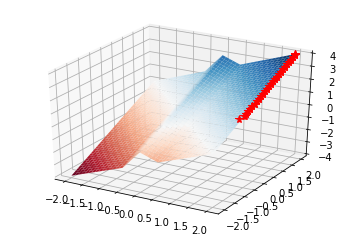

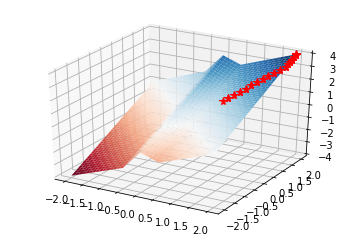

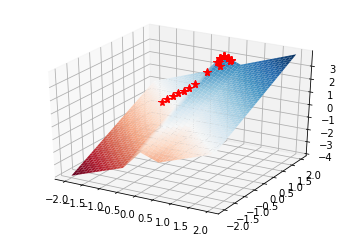

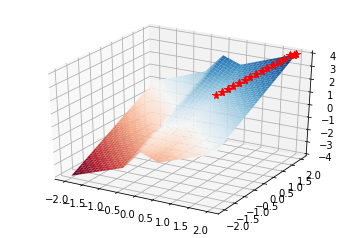

In [10]:
# Template 
# Plot the landscape (un/comment relevant line)
plt.ion()
for i in range(6):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
    #ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 50
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-2, 2, size = 2)
    #startPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    GradAscent(StartPt,NumSteps,LRate)
    #HillClimb(StartPt,NumSteps,MaxMutate)
    
    print('GradAscent', GradAscent(StartPt,NumSteps,LRate))
    #print(HillClimb)

## 1.1 Hill Climbing

HillClimb (21, 1)
HillClimb (19, 1)
HillClimb (16, 1)
HillClimb (11, 1)
HillClimb (50, 0)
HillClimb (41, 1)


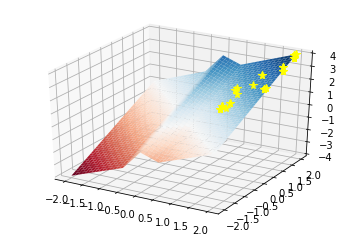

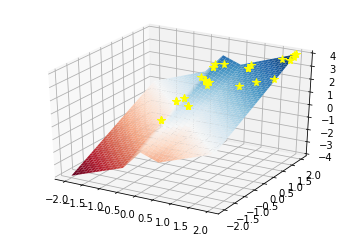

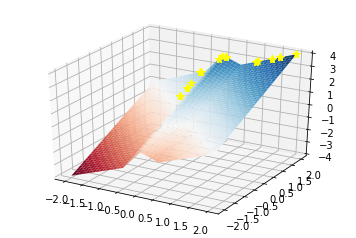

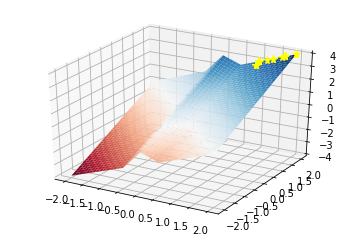

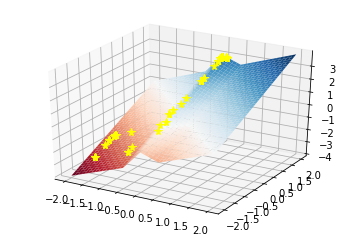

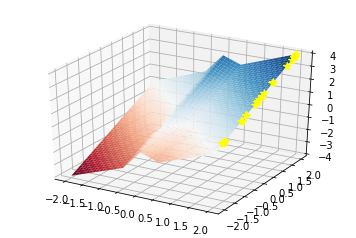

In [11]:
# Template 
# Plot the landscape (un/comment relevant line)
plt.ion()
for i in range(6):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
    #ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 50
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-2, 2, size = 2)
    #StartPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    #GradAscent(StartPt,NumSteps,LRate)
    HillClimb(StartPt,NumSteps,MaxMutate)
    
    #print(GradAscent)
    print('HillClimb', HillClimb(StartPt,NumSteps,MaxMutate))

## 1.1 Gradient Ascent & Hill Climbing together

GradAscent (50, 0)
HillClimb (50, 0)
GradAscent (50, 0)
HillClimb (32, 1)
GradAscent (50, 0)
HillClimb (21, 1)
GradAscent (50, 0)
HillClimb (40, 1)
GradAscent (50, 0)
HillClimb (50, 0)
GradAscent (26, 1)
HillClimb (15, 1)


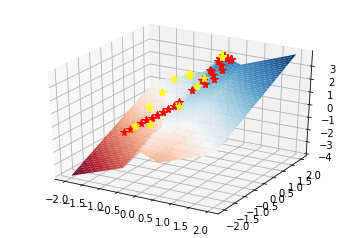

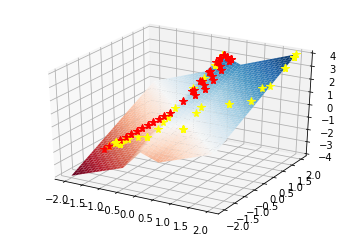

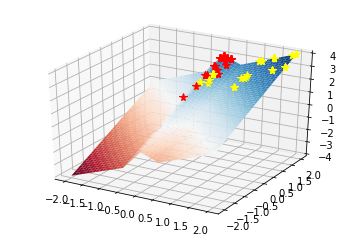

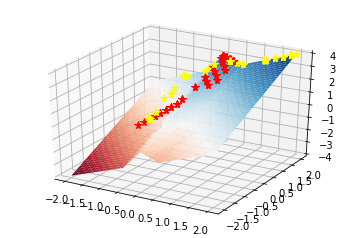

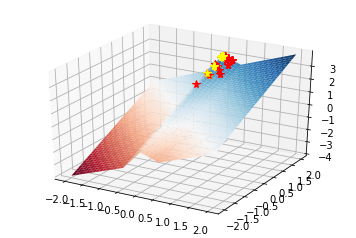

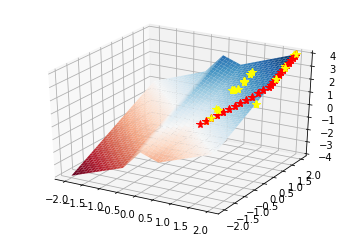

In [12]:
# Template 
# Plot the landscape (un/comment relevant line)
plt.ion()
for i in range(6):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
    #ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 50
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-2, 2, size = 2)
    #StartPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    GradAscent(StartPt,NumSteps,LRate)
    HillClimb(StartPt,NumSteps,MaxMutate)
    
    print('GradAscent', GradAscent(StartPt,NumSteps,LRate))
    print('HillClimb', HillClimb(StartPt,NumSteps,MaxMutate))

GradAscent (100, 0)
HillClimb (20, 1)
GradAscent (100, 0)
HillClimb (30, 1)
GradAscent (17, 1)
HillClimb (7, 1)
GradAscent (38, 1)
HillClimb (17, 1)
GradAscent (100, 0)
HillClimb (100, 0)
GradAscent (100, 0)
HillClimb (24, 1)
GradAscent (13, 1)
HillClimb (9, 1)
GradAscent (100, 0)
HillClimb (33, 1)
GradAscent (100, 0)
HillClimb (43, 1)
GradAscent (100, 0)
HillClimb (100, 0)


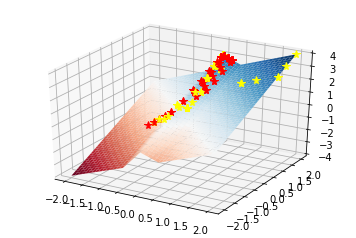

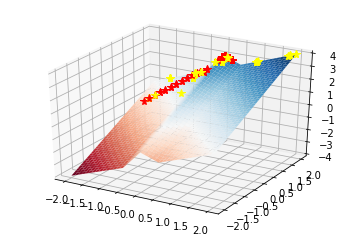

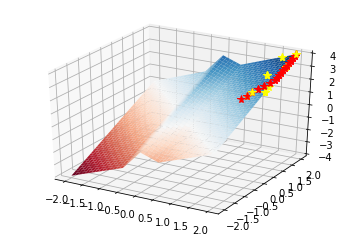

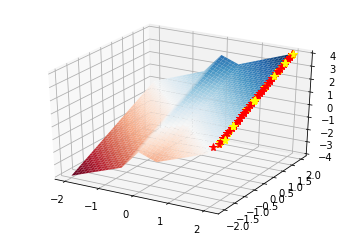

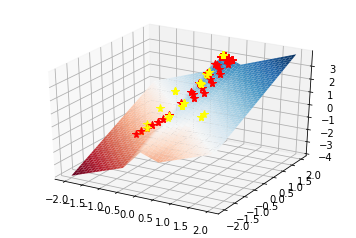

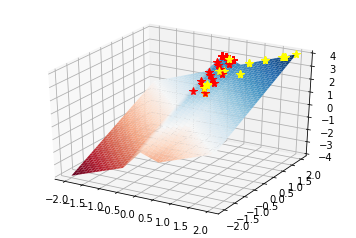

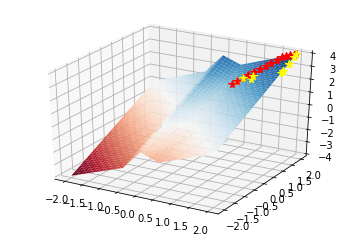

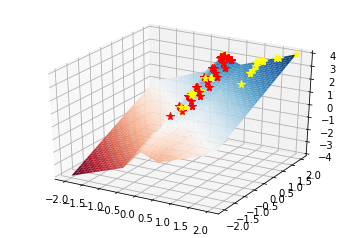

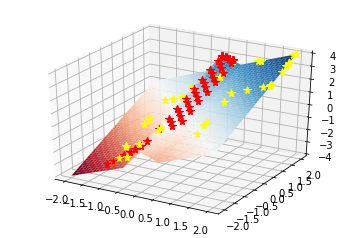

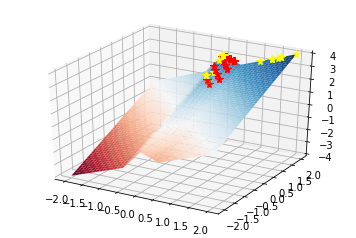

In [13]:
# Template 
# Plot the landscape (un/comment relevant line)
plt.ion()
for i in range(10):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
    #ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 100
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-2, 2, size = 2)
    #StartPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    GradAscent(StartPt,NumSteps,LRate)
    HillClimb(StartPt,NumSteps,MaxMutate)
    
    print('GradAscent', GradAscent(StartPt,NumSteps,LRate))
    print('HillClimb', HillClimb(StartPt,NumSteps,MaxMutate))

## 1.2

## 1.2 Gradient Ascent

In [14]:
def drawGradAscent(numSteps, LRate):
    x = np.arange(-2.0, 2.025, 0.25)
    y = np.arange(-2.0, 2.025, 0.25)
    gridP = []
    for i in range(len(x)):
        for j in range(len(y)):
            gridP.append([np.around(x[i], decimals=2), np.around(y[j], decimals=2)])

    data = []
    iterationsMaximum = []

    for g in gridP:
        reachedMaximum = GradAscent(g, numSteps, LRate)
        data.append([g[0], g[1], reachedMaximum[0]])
        if reachedMaximum[1] == 1:
            iterationsMaximum.append(reachedMaximum[0])

    df = pd.DataFrame(data = data, columns = ['x', 'y', 'Iterations that reached Max'])
    df = df.pivot('x', 'y', 'Iterations that reached Max')

    fig, ax = plt.subplots(figsize = (10, 5))
    sns.heatmap(df, cmap = "YlOrRd", ax = ax, vmin = 0, vmax = numSteps,
                annot = False, yticklabels = 2, xticklabels = 2)

    sumOfIterations = 0
    for i in iterationsMaximum:
        sumOfIterations += i
    lengthOfIterations = len(iterationsMaximum)
    meanOfIterations = sumOfIterations / lengthOfIterations

    return (lengthOfIterations, meanOfIterations)

,Gradient Ascent
Iterations that reached Max,119.000000
Mean Iterations,22.411765


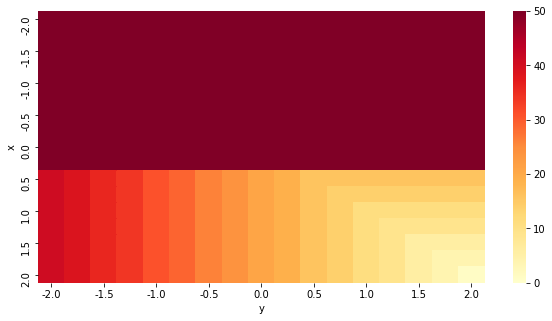

In [15]:
firstGrad = drawGradAscent(50,0.1)
data = [firstGrad[0],firstGrad[1]]
pd.DataFrame(list(firstGrad), index = ['Iterations that reached Max','Mean Iterations'],columns=['Gradient Ascent'])

## 1.2 Hill Climbing

In [16]:
def drawHillClimb(numSteps, MaxMutate):
    x = np.arange(-2.0, 2.025, 0.25)
    y = np.arange(-2.0, 2.025, 0.25)
    gridP = []
    for i in range(len(x)):
        for j in range(len(y)):
            gridP.append([np.around(x[i], decimals=2), np.around(y[j], decimals=2)])

    data = []
    iterationsMaximum = []

    for g in gridP:
        reachedMaximum = HillClimb(g, numSteps, MaxMutate)
        data.append([g[0], g[1], reachedMaximum[0]])
        if reachedMaximum[1] == 1:
            iterationsMaximum.append(reachedMaximum[0])

    df = pd.DataFrame(data=data, columns=['x', 'y', 'Iterations that reached Max'])
    df = df.pivot('x', 'y', 'Iterations that reached Max')

    fig, ax = plt.subplots(figsize = (10, 5))
    sns.heatmap(df, cmap = "YlOrRd", ax = ax, vmin = 0, vmax = numSteps,
                annot = False, yticklabels = 2, xticklabels = 2)

    sumOfIterations = 0
    for i in iterationsMaximum:
        sumOfIterations += i
    lengthOfIterations = len(iterationsMaximum)
    meanOfIterations = sumOfIterations / lengthOfIterations

    return (lengthOfIterations, meanOfIterations)


,Hill Climb
Iterations that reached Max,200.000
Mean Iterations,25.935


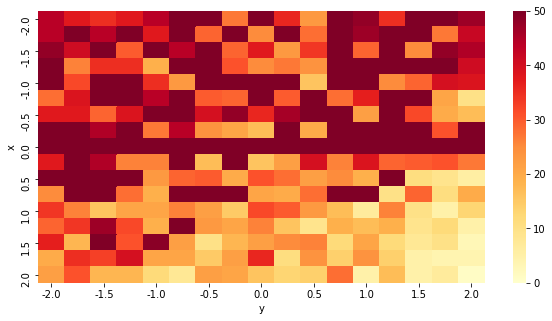

In [17]:
firstHill = drawHillClimb(50,1)
data = [firstHill[0],firstHill[1]]
pd.DataFrame(list(firstHill), index = ['Iterations that reached Max','Mean Iterations'],columns=['Hill Climb'])

## 1.3

## 1.3 Gradient Ascent

,Gradient Ascent
Iterations that reached Max,204.000000
Mean Iterations,5.872549


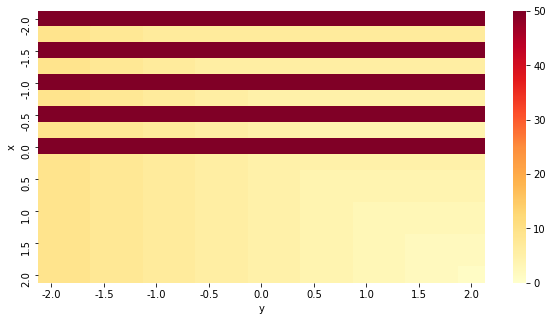

In [96]:
secondGrad = drawGradAscent(50,0.5)
data = [secondGrad[0],secondGrad[1]]
pd.DataFrame(list(secondGrad), index = ['Iterations that reached Max','Mean Iterations'],columns=['Gradient Ascent'])

,Gradient Ascent
Iterations that reached Max,187.000000
Mean Iterations,3.705882


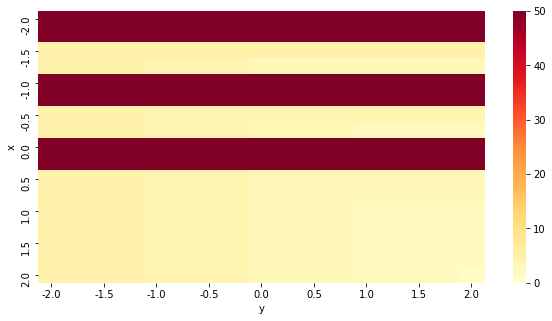

In [97]:
thirdGrad = drawGradAscent(50,1)
data = [thirdGrad[0],thirdGrad[1]]
pd.DataFrame(list(thirdGrad), index = ['Iterations that reached Max','Mean Iterations'],columns=['Gradient Ascent'])

,Gradient Ascent
Iterations that reached Max,255.000000
Mean Iterations,11.196078


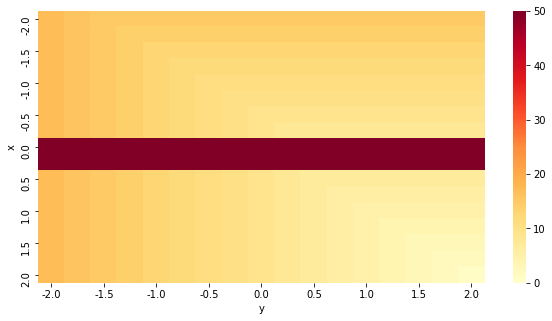

In [98]:
forthGrad = drawGradAscent(50,0.25)
data = [forthGrad[0],forthGrad[1]]
pd.DataFrame(list(forthGrad), index = ['Iterations that reached Max','Mean Iterations'],columns=['Gradient Ascent'])

## 1.3 Hill Climbing

,Hill Climb
Iterations that reached Max,86.000000
Mean Iterations,28.337209


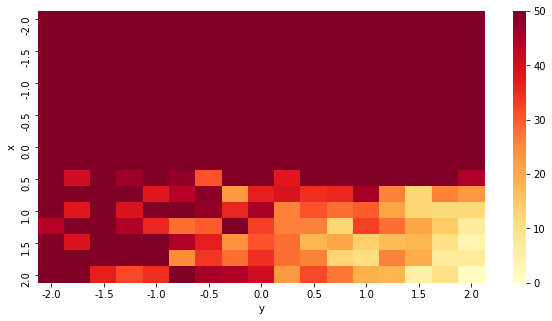

In [99]:
secondHill = drawHillClimb(50,0.5)
data = [secondHill[0],secondHill[1]]
pd.DataFrame(list(secondHill), index = ['Iterations that reached Max','Mean Iterations'],columns=['Hill Climb'])

,Hill Climb
Iterations that reached Max,9.000000
Mean Iterations,29.444444


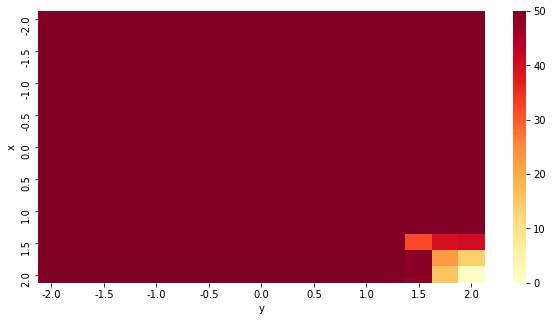

In [100]:
thirdHill = drawHillClimb(50,0.1)
data = [thirdHill[0],thirdHill[1]]
pd.DataFrame(list(thirdHill), index = ['Iterations that reached Max','Mean Iterations'],columns=['Hill Climb'])

,Hill Climb
Iterations that reached Max,289.000000
Mean Iterations,16.934256


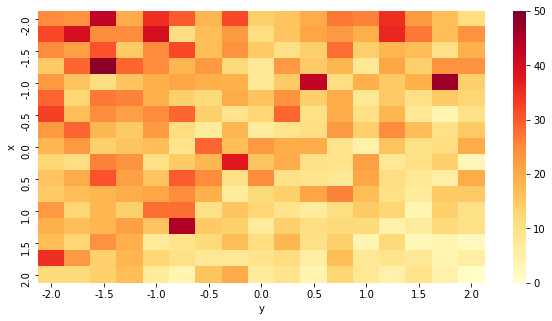

In [101]:
forthHill = drawHillClimb(50,2)
data = [forthHill[0],forthHill[1]]
pd.DataFrame(list(forthHill), index = ['Iterations that reached Max','Mean Iterations'],columns=['Hill Climb'])

## 2.1

## Estimate Maximum of Landscape

In [122]:
# Function implementing gradient ascent
def GradAscentComplex(StartPt,NumSteps,LRate,MaxP):
    MaxFoundFlag = 0
    for i in range(NumSteps):
        
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        Height = ComplexLandscape (StartPt[0],StartPt[1])
        
        # TO DO: Plot point on the landscape 
        # Use a markersize that you can see well enough (e.g., * in size 10)
        #ax.plot([StartPt[0]],[StartPt[1]],[Height], '*', color = 'Red', MarkerSize = 8)      
        
        # TO DO: Calculate the gradient at StartPt using SimpleLandscapeGrad or ComplexLandscapeGrad
        GradientAtStartPt = ComplexLandscapeGrad(StartPt[0],StartPt[1])
        
        # TO DO: Calculate the new point and update StartPt
        StartPt += LRate * GradientAtStartPt
        
        # Ensure StartPt is within the specified bounds (un/comment relevant lines)
        StartPt = np.maximum(StartPt,[-3,-3])
        StartPt = np.minimum(StartPt,[7,7])
        
        #NB: to stop the algorithm after the maximum has been
        #reached, use an if statement to test whether the maximum height has been
        #reached, then use the function break to break out of the for loop.
        iterations = i + 1
        if (abs(Height - MaxP) < 0.01):
            MaxFoundFlag = 1 # flag to show that the maximum has been reached
            return ( iterations, MaxFoundFlag, Height)
            break
        
    return ( iterations, MaxFoundFlag, Height)   

In [123]:
# Function implementing hill climbing
def HillClimbComplex(StartPt,NumSteps,MaxMutate,MaxP):
    MaxFoundFlag = 0
    for i in range(NumSteps):
        
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        Height = ComplexLandscape(StartPt[0],StartPt[1])

        # TO DO: Plot point on the landscape 
        # Use a markersize that you can see well enough (e.g., * in size 10)
        #ax.plot([StartPt[0]],[StartPt[1]],[Height], '*', color = 'Yellow', MarkerSize = 8)

        # Mutate StartPt into NewPt
        NewPt = Mutate(np.copy(StartPt),MaxMutate) # Use copy because Python passes variables by references (see Mutate function)
        
        # Ensure NewPt is within the specified bounds (un/comment relevant lines)
        NewPt = np.maximum(NewPt,[-3,-3])
        NewPt = np.minimum(NewPt,[7,7])
               
        # TO DO: Calculate the height of the new point
        newHeight = ComplexLandscape(NewPt[0],NewPt[1])
            
        # TO DO: Decide whether to update StartPt or not
        if newHeight > Height:
            StartPt = NewPt  # substitutes old height with new when new is bigger
         
        #NB: to stop the algorithm after the maximum has been
        #reached, use an if statement to test whether the maximum height has been
        #reached, then use the function break to break out of the for loop.
        iterations = i + 1
        if (abs(Height - MaxP) < 0.3):
            MaxFoundFlag = 1 # flag to show that the maximum has been reached
            return ( iterations, MaxFoundFlag, Height)
            break
        
    return ( iterations, MaxFoundFlag, Height)


In [113]:
def findMaxPoint(StartPt):
    Height = ComplexLandscape(StartPt[0],StartPt[1])
    maxPoint = 0
    if(Height > maxPoint):
        maxPoint = Height
    return maxPoint

maxLst = []
for i in range(1000000): #1 million repetitions to get good estimate of max point
    StartPt = np.random.uniform(-3, 7, size = 2)
    maxLst.append(findMaxPoint(StartPt)) #storing the highest height reached in the list
maxPoint = (max(maxLst))
print(maxPoint)

12.23476607998441


## 2.1 Gradient Ascent

GradAscent (1000, 0)
GradAscent (1000, 0)
GradAscent (1000, 0)
GradAscent (1000, 0)
GradAscent (1000, 0)
GradAscent (443, 1)


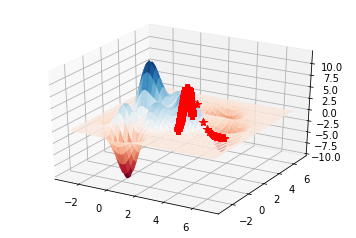

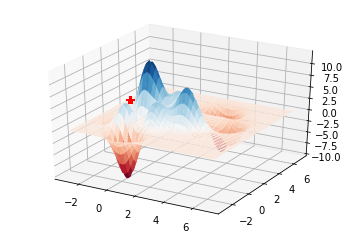

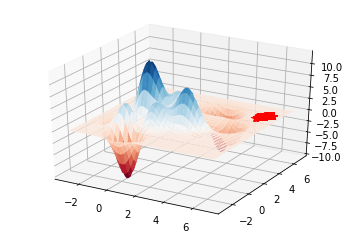

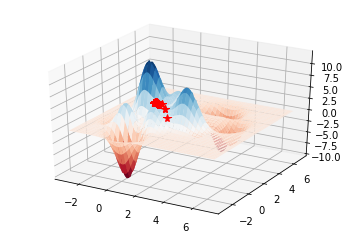

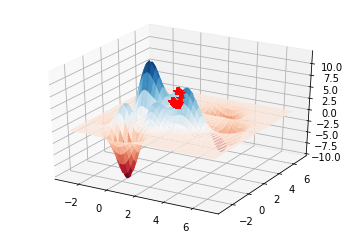

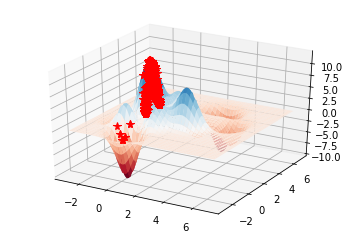

In [117]:
plt.ion()
for i in range(6):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 1000
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    MaxP = maxPoint
    GradAscentComplex(StartPt,NumSteps,LRate,MaxP)
    #HillClimbComplex(StartPt,NumSteps,MaxMutate)
    
    print('GradAscent', GradAscentComplex(StartPt,NumSteps,LRate,MaxP))
    #print('HillClimb', HillClimbComplex(StartPt,NumSteps,MaxMutate))

## 2.1 Hill Climbing

HillClimb (18, 1)
HillClimb (1000, 0)
HillClimb (1000, 0)
HillClimb (115, 1)
HillClimb (1000, 0)
HillClimb (24, 1)


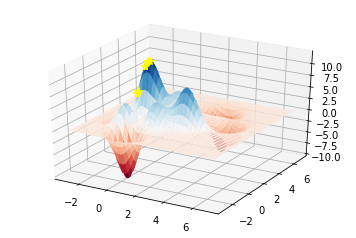

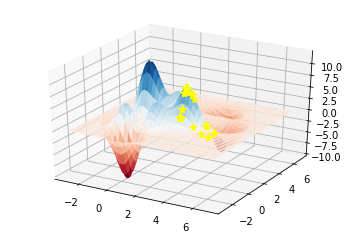

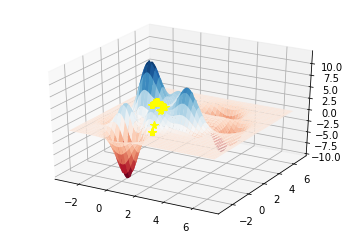

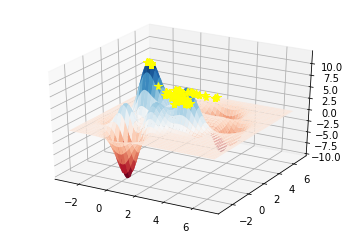

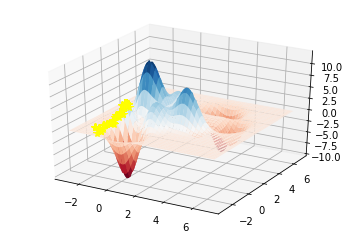

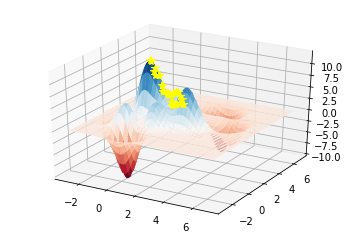

In [118]:
plt.ion()
for i in range(6):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 1000
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    MaxP = maxPoint
    #GradAscentComplex(StartPt,NumSteps,LRate,MaxP)
    HillClimbComplex(StartPt,NumSteps,MaxMutate,MaxP)
    
    #print('GradAscent', GradAscentComplex(StartPt,NumSteps,LRate,MaxP))
    print('HillClimb', HillClimbComplex(StartPt,NumSteps,MaxMutate,MaxP))

## 2.1 Gradient Ascent & Hill Climbing

GradAscent (633, 1) 
 HillClimb (14, 1)
GradAscent (416, 1) 
 HillClimb (1000, 0)
GradAscent (1000, 0) 
 HillClimb (1000, 0)
GradAscent (1000, 0) 
 HillClimb (1000, 0)
GradAscent (1000, 0) 
 HillClimb (1000, 0)
GradAscent (200, 1) 
 HillClimb (29, 1)
GradAscent (1000, 0) 
 HillClimb (1000, 0)
GradAscent (1000, 0) 
 HillClimb (1000, 0)
GradAscent (1000, 0) 
 HillClimb (1000, 0)
GradAscent (1000, 0) 
 HillClimb (40, 1)


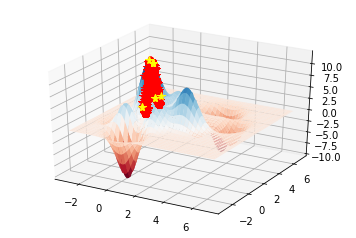

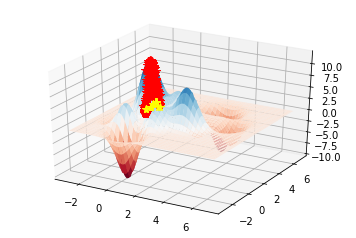

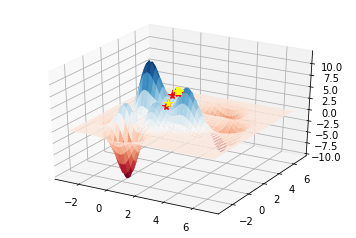

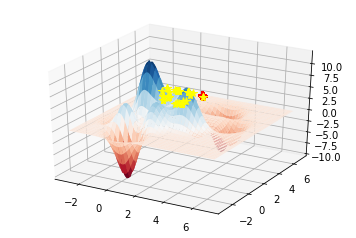

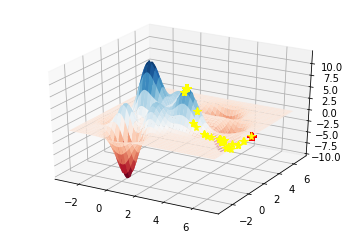

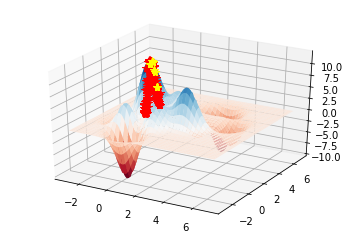

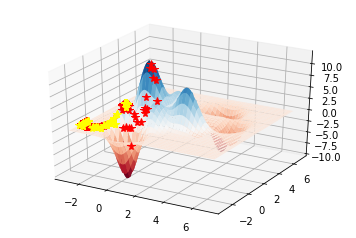

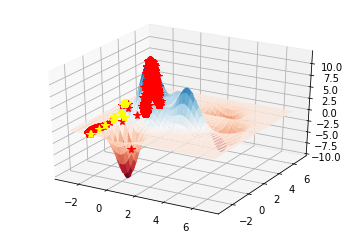

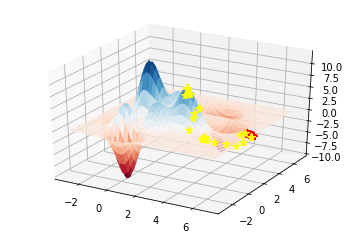

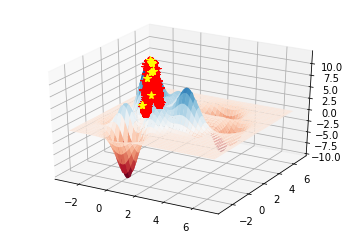

In [119]:
plt.ion()
for i in range(10):
    fig = plt.figure()
    ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)

    # Enter maximum number of iterations of the algorithm, learning rate and mutation range
    NumSteps = 1000
    LRate = 0.1
    MaxMutate = 1

    # TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape
    StartPt = np.random.uniform(-3, 7, size = 2)

    # Find maximum (un/comment relevant line)
    MaxP = maxPoint
    a = GradAscentComplex(StartPt,NumSteps,LRate,MaxP)
    b = HillClimbComplex(StartPt,NumSteps,MaxMutate,MaxP)
    
    print ('GradAscent', a, '\n' , 'HillClimb' , b) 
    #print('HillClimb', HillClimbComplex(StartPt,NumSteps,MaxMutate,MaxP))

## 2.2

## 2.2 Gradient Ascent

In [153]:
def drawGradAscentComplex(numSteps, LRate):
    x = np.arange(-3, 7.025, 0.1)
    y = np.arange(-3, 7.025, 0.1)
    gridP = []
    list1 = []
    for i in range(len(x)):
        for j in range(len(y)):
            gridP.append([np.around(x[i], decimals=2), np.around(y[j], decimals = 2)])

    data = []

    for g in gridP:
        reachedMaximum = GradAscentComplex(g, numSteps, LRate, MaxP)
        data.append([g[0], g[1], reachedMaximum[2]])
        list1.append(reachedMaximum[2])

    df = pd.DataFrame(data = data, columns = ['x', 'y', 'Iterations that reached Max'])
    df = df.pivot('x', 'y', 'Iterations that reached Max')

    fig, ax = plt.subplots(figsize = (10, 5))
    sns.heatmap(df, cmap = "RdYlGn", ax = ax, vmin = 0, vmax = MaxP,annot = False, yticklabels = 10, xticklabels = 10)
    sumIter = 0
    for i in list1:
        sumIter += i
    meanOfIterations =sumIter / len(list1)
    return (meanOfIterations)

2.1328954266798803


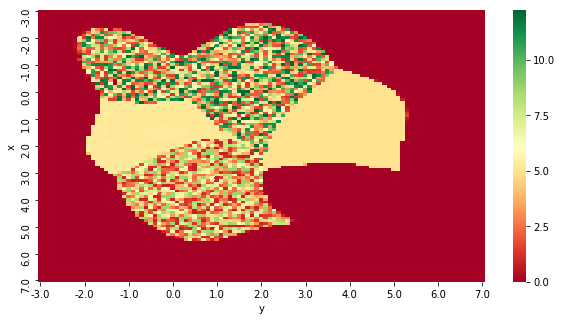

In [154]:
print(drawGradAscentComplex(50,0.1))

In [155]:
def drawHillClimbComplex(numSteps, MaxMutate):
    x = np.arange(-3, 7.025, 0.1)
    y = np.arange(-3, 7.025, 0.1)
    gridP = []
    list1 = []

    for i in range(len(x)):
        for j in range(len(y)):
            gridP.append([np.around(x[i], decimals=2), np.around(y[j], decimals=2)])

    data = []
    for g in gridP:
        reachedMaximum = HillClimbComplex(g, numSteps, MaxMutate, MaxP)
        data.append([g[0], g[1], reachedMaximum[2]])
        list1.append(reachedMaximum[2])

    df = pd.DataFrame(data = data, columns = ['x', 'y', 'Iterations that reached Max'])
    df = df.pivot('x', 'y', 'Iterations that reached Max')

    fig, ax = plt.subplots(figsize = (10, 5))
    sns.heatmap(df, cmap = "RdYlGn", ax = ax, vmin = 0, vmax = MaxP,
                annot = False, yticklabels = 10, xticklabels = 10)
    sumIterations = 0
    for i in list1:
        sumIterations += i
    meanOfIterations =sumIterations/ len(list1)
    return (meanOfIterations)

6.33159352600461


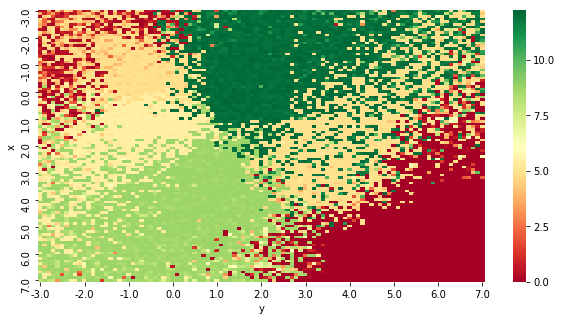

In [156]:
print(drawHillClimbComplex(50,1))

3.2534046122488043


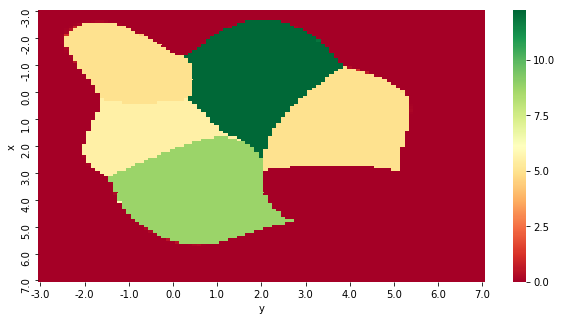

In [157]:
print(drawGradAscentComplex(1000,0.01))

6.379429661627092


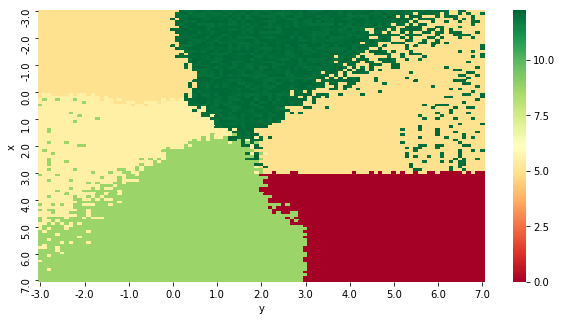

In [158]:
print(drawHillClimbComplex(1000,0.2))

0.004008621690816231


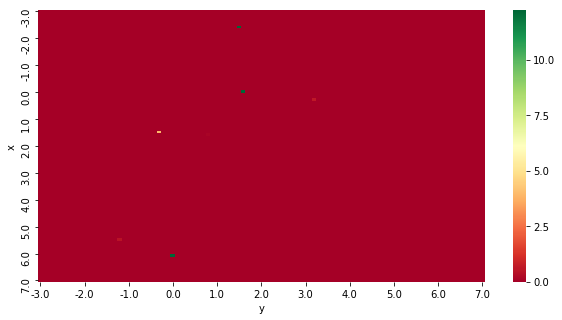

In [159]:
print(drawGradAscentComplex(1000,1))

10.272453039081592


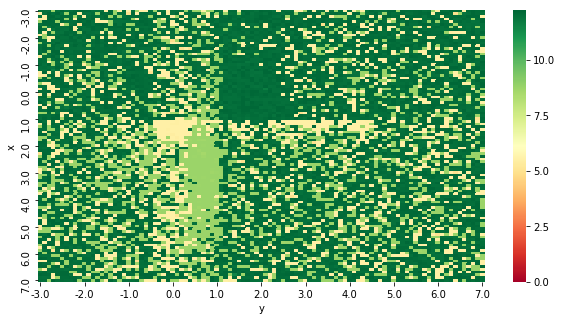

In [160]:
print(drawHillClimbComplex(1000,10))